In [92]:
import pandas as pd
import numpy as np

In [93]:
df = pd.read_csv('amazon_laptops.csv')

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Unnamed: 0                 220 non-null    int64 
 1   brand                      220 non-null    object
 2   model_name                 220 non-null    object
 3   screen_size (sm)           220 non-null    object
 4   price(₹)                   220 non-null    object
 5   ram                        200 non-null    object
 6   storage                    220 non-null    object
 7   cpu_model                  216 non-null    object
 8   operating_system           220 non-null    object
 9   rating                     220 non-null    object
 10  rating_review              220 non-null    object
 11  graphics_card_description  220 non-null    object
dtypes: int64(1), object(11)
memory usage: 20.8+ KB


In [95]:
df.head()

,Unnamed: 0,brand,model_name,screen_size (sm),price(₹),ram,storage,cpu_model,operating_system,rating,rating_review,graphics_card_description
0,0,HP,HP Laptop,39.6 Centimetres,"48,990",16 GB,512 GB,Core i5,Windows 11 Home,3.7 out of 5 stars,453 ratings,Integrated
1,1,HP,HP Laptop,39.6 Centimetres,"35,490",12 GB,512 GB,Core i3 Family,Windows 11 Home,4.0 out of 5 stars,642 ratings,Integrated
2,2,ASUS,ASUS Vivobook 15,15.6 Inches,"41,990",8 GB,512 GB,Ryzen 7,Windows 11 Home,3.9 out of 5 stars,42 ratings,Integrated
3,3,HP,HP Laptop,39.6 Centimetres,"35,490",12 GB,512 GB,Core i3 Family,Windows 11 Home,4.0 out of 5 stars,642 ratings,Integrated
4,4,HP,Hp Laptop,14 Inches,"1,23,900",32 GB,1 TB,Intel Core Ultra 7,Windows 11 Home,No rating,no rating_review,Dedicated


In [96]:
df['screen_size (sm)'].value_counts()

screen_size (sm)
15.6 Inches         74
39.6 Centimetres    38
14 Inches           28
no screen_size      19
13.6 Inches         13
16 Inches           11
35.6 Centimetres     8
15 Inches            5
14.1 Inches          5
11.6 Inches          3
15.6                 2
15.3 Inches          2
13.3 Inches          2
15.3                 2
40.6 Centimetres     2
17.3 Inches          1
40.9 Centimetres     1
11.5 Inches          1
44 Centimetres       1
40 Centimetres       1
12.7 Inches          1
Name: count, dtype: int64

In [97]:
def screen_size_clean(value):
    result = value.split()[0]
    result = result.replace('no', '1')
    return float(result) 

df['screen_size (sm)'] = df['screen_size (sm)'].apply(screen_size_clean)

In [98]:
df['screen_size (sm)'].value_counts()

screen_size (sm)
15.6    76
39.6    38
14.0    28
1.0     19
13.6    13
16.0    11
35.6     8
15.0     5
14.1     5
15.3     4
11.6     3
13.3     2
40.6     2
40.9     1
11.5     1
44.0     1
17.3     1
40.0     1
12.7     1
Name: count, dtype: int64

In [99]:
avg = df['screen_size (sm)'].mean()
df['screen_size (sm)'] = df['screen_size (sm)'].replace(1, avg)

In [100]:
df['screen_size (sm)'].value_counts()

screen_size (sm)
15.600000    76
39.600000    38
14.000000    28
19.339545    19
13.600000    13
16.000000    11
35.600000     8
15.000000     5
14.100000     5
15.300000     4
11.600000     3
13.300000     2
40.600000     2
40.900000     1
11.500000     1
44.000000     1
17.300000     1
40.000000     1
12.700000     1
Name: count, dtype: int64

In [101]:
df['screen_size (sm)'] = df['screen_size (sm)'].round(1)

In [102]:
df['screen_size (sm)'].value_counts()

screen_size (sm)
15.6    76
39.6    38
14.0    28
19.3    19
13.6    13
16.0    11
35.6     8
15.0     5
14.1     5
15.3     4
11.6     3
13.3     2
40.6     2
40.9     1
11.5     1
44.0     1
17.3     1
40.0     1
12.7     1
Name: count, dtype: int64

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 220 non-null    int64  
 1   brand                      220 non-null    object 
 2   model_name                 220 non-null    object 
 3   screen_size (sm)           220 non-null    float64
 4   price(₹)                   220 non-null    object 
 5   ram                        200 non-null    object 
 6   storage                    220 non-null    object 
 7   cpu_model                  216 non-null    object 
 8   operating_system           220 non-null    object 
 9   rating                     220 non-null    object 
 10  rating_review              220 non-null    object 
 11  graphics_card_description  220 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage: 20.8+ KB


In [104]:
df['price(₹)'].value_counts()

price(₹)
48,990    14
54,990    11
35,490     9
65,990     7
92,990     7
          ..
84,990     1
52,280     1
93,990     1
42,490     1
41,500     1
Name: count, Length: 118, dtype: int64

In [105]:
def price_clean(value):
    result = str(value).replace(',', '')
    return float(result)
df['price(₹)'] = df['price(₹)'].apply(price_clean)
df['price(₹)'] = df['price(₹)'].round(1)

In [106]:
df['price(₹)'].value_counts()

price(₹)
48990.0    14
54990.0    11
35490.0     9
65990.0     7
92990.0     7
           ..
84990.0     1
52280.0     1
93990.0     1
42490.0     1
41500.0     1
Name: count, Length: 118, dtype: int64

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 220 non-null    int64  
 1   brand                      220 non-null    object 
 2   model_name                 220 non-null    object 
 3   screen_size (sm)           220 non-null    float64
 4   price(₹)                   220 non-null    float64
 5   ram                        200 non-null    object 
 6   storage                    220 non-null    object 
 7   cpu_model                  216 non-null    object 
 8   operating_system           220 non-null    object 
 9   rating                     220 non-null    object 
 10  rating_review              220 non-null    object 
 11  graphics_card_description  220 non-null    object 
dtypes: float64(2), int64(1), object(9)
memory usage: 20.8+ KB


In [108]:
df['ram'].value_counts()

ram
16 GB     117
8 GB       36
no ram     20
12 GB       9
32 GB       6
24 GB       6
4 GB        5
6 GB        1
Name: count, dtype: int64

In [109]:
def ram_clean(value):
    if pd.isna(value):   
        return 1         
    
    result = value.split()[0]
    result = result.replace('no', '1')
    return int(result)

df['ram'] = df['ram'].apply(ram_clean)

In [110]:
df['ram'].value_counts()

ram
16    117
1      40
8      36
12      9
32      6
24      6
4       5
6       1
Name: count, dtype: int64

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 220 non-null    int64  
 1   brand                      220 non-null    object 
 2   model_name                 220 non-null    object 
 3   screen_size (sm)           220 non-null    float64
 4   price(₹)                   220 non-null    float64
 5   ram                        220 non-null    int64  
 6   storage                    220 non-null    object 
 7   cpu_model                  216 non-null    object 
 8   operating_system           220 non-null    object 
 9   rating                     220 non-null    object 
 10  rating_review              220 non-null    object 
 11  graphics_card_description  220 non-null    object 
dtypes: float64(2), int64(2), object(8)
memory usage: 20.8+ KB


In [112]:
df['cpu_model'].value_counts()

cpu_model
Core i5                38
no cpu_model           24
Core i3                17
Ryzen 5                16
Apple M4               14
Ryzen 7                13
Core i3 Family         10
Others                  9
Intel Core i7           7
Ryzen 3                 7
AMD Ryzen 7             7
Snapdragon              6
Celeron N4020           5
Intel Core Ultra 5      5
Intel Core 7            3
Intel Core i5           3
Intel Core 5            3
Ryzen 9                 3
Intel Core Ultra 9      2
MediaTek Helio          2
Athlon                  2
Intel Core Ultra 7      2
Core i5-12450H          2
Core i5 Family          2
Celeron N               2
Celeron                 2
Intel Core i3           2
Amd Ryzen 3 7320U       1
Core i3-1215U           1
Core i7-13700K          1
Ryzen 3 5300U           1
AMD Ryzen 5 3450U       1
Intel Core i7-1355U     1
Snapdragon X            1
AMD Ryzen 5 5500U       1
Name: count, dtype: int64

In [113]:
df['cpu_model'] = df['cpu_model'].fillna('Others')

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 220 non-null    int64  
 1   brand                      220 non-null    object 
 2   model_name                 220 non-null    object 
 3   screen_size (sm)           220 non-null    float64
 4   price(₹)                   220 non-null    float64
 5   ram                        220 non-null    int64  
 6   storage                    220 non-null    object 
 7   cpu_model                  220 non-null    object 
 8   operating_system           220 non-null    object 
 9   rating                     220 non-null    object 
 10  rating_review              220 non-null    object 
 11  graphics_card_description  220 non-null    object 
dtypes: float64(2), int64(2), object(8)
memory usage: 20.8+ KB


In [115]:
df['rating'].value_counts()

rating
4.0 out of 5 stars    32
3.9 out of 5 stars    30
3.7 out of 5 stars    26
3.8 out of 5 stars    21
4.1 out of 5 stars    19
4.6 out of 5 stars    16
4.2 out of 5 stars    14
3.6 out of 5 stars    13
3.4 out of 5 stars    12
4.3 out of 5 stars     8
3.5 out of 5 stars     6
4.4 out of 5 stars     6
No rating              3
4.8 out of 5 stars     2
3.2 out of 5 stars     2
5.0 out of 5 stars     2
3.1 out of 5 stars     2
2.5 out of 5 stars     1
3.0 out of 5 stars     1
1.0 out of 5 stars     1
3.3 out of 5 stars     1
4.5 out of 5 stars     1
4.7 out of 5 stars     1
Name: count, dtype: int64

In [116]:
def rating_clean(value):
    result = value.split()[0]
    result = result.replace('No', '1')
    return float(result) 
    
df['rating'] = df['rating'].apply(rating_clean)

In [117]:
df['rating'].value_counts()

rating
4.0    32
3.9    30
3.7    26
3.8    21
4.1    19
4.6    16
4.2    14
3.6    13
3.4    12
4.3     8
3.5     6
4.4     6
1.0     4
4.8     2
3.2     2
5.0     2
3.1     2
2.5     1
3.0     1
3.3     1
4.5     1
4.7     1
Name: count, dtype: int64

In [118]:
avg = df['rating'].mean()
df['rating'] = df['rating'].replace(1, avg)

In [119]:
df['rating'].value_counts()

rating
4.000000    32
3.900000    30
3.700000    26
3.800000    21
4.100000    19
4.600000    16
4.200000    14
3.600000    13
3.400000    12
4.300000     8
3.500000     6
4.400000     6
3.885909     4
4.800000     2
3.200000     2
5.000000     2
3.100000     2
2.500000     1
3.000000     1
3.300000     1
4.500000     1
4.700000     1
Name: count, dtype: int64

In [120]:
df['rating'] = df['rating'].round(1)

In [121]:
df['rating'].value_counts()

rating
3.9    34
4.0    32
3.7    26
3.8    21
4.1    19
4.6    16
4.2    14
3.6    13
3.4    12
4.3     8
3.5     6
4.4     6
4.8     2
3.2     2
5.0     2
3.1     2
2.5     1
3.0     1
3.3     1
4.5     1
4.7     1
Name: count, dtype: int64

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 220 non-null    int64  
 1   brand                      220 non-null    object 
 2   model_name                 220 non-null    object 
 3   screen_size (sm)           220 non-null    float64
 4   price(₹)                   220 non-null    float64
 5   ram                        220 non-null    int64  
 6   storage                    220 non-null    object 
 7   cpu_model                  220 non-null    object 
 8   operating_system           220 non-null    object 
 9   rating                     220 non-null    float64
 10  rating_review              220 non-null    object 
 11  graphics_card_description  220 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 20.8+ KB


In [123]:
df['rating_review'].value_counts()

rating_review
453 ratings      13
614 ratings      13
642 ratings      11
120 ratings      10
45 ratings        7
                 ..
87 ratings        1
119 ratings       1
5 ratings         1
292 ratings       1
1,202 ratings     1
Name: count, Length: 104, dtype: int64

In [124]:
def rating_review_clean(value):
    result = value.split()[0]
    result = result.replace('no', '1')   
    result = result.replace(',', '')      
    return int(result)

df['rating_review'] = df['rating_review'].apply(rating_review_clean)

In [125]:
df['rating_review'].value_counts()

rating_review
453     13
614     13
642     11
120     10
28       7
        ..
87       1
119      1
5        1
292      1
1202     1
Name: count, Length: 103, dtype: int64

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 220 non-null    int64  
 1   brand                      220 non-null    object 
 2   model_name                 220 non-null    object 
 3   screen_size (sm)           220 non-null    float64
 4   price(₹)                   220 non-null    float64
 5   ram                        220 non-null    int64  
 6   storage                    220 non-null    object 
 7   cpu_model                  220 non-null    object 
 8   operating_system           220 non-null    object 
 9   rating                     220 non-null    float64
 10  rating_review              220 non-null    int64  
 11  graphics_card_description  220 non-null    object 
dtypes: float64(3), int64(3), object(6)
memory usage: 20.8+ KB


In [127]:
df['storage'].value_counts()

storage
512 GB        122
1 TB           40
no storage     30
256 GB         19
128 GB          6
64 GB           2
1000 GB         1
Name: count, dtype: int64

In [128]:
def storage_clean(value):
    if 'TB' in value:
        result = value.split()[0]
        result = result.replace(',', '')
        return int(float(result) * 1000)  
    else:
        result = value.split()[0]
        result = result.replace('no', '1')
        result = result.replace(',', '')
        return int(result)

df['storage'] = df['storage'].apply(storage_clean)

In [129]:
df['storage'].value_counts()

storage
512     122
1000     41
1        30
256      19
128       6
64        2
Name: count, dtype: int64

In [130]:
avg = df['storage'].mean()
df['storage'] = df['storage'].replace(1, avg)

In [131]:
df['storage'] = df['storage'].round(1)
# round - nuqtadan keingi sonlarning nechtasini olib qolishi kerakligini aniqlaydi

In [132]:
df['storage'].value_counts()

storage
512.0     122
1000.0     41
496.6      30
256.0      19
128.0       6
64.0        2
Name: count, dtype: int64

In [133]:
df['storage'] = df['storage'].replace(496.6, 1)
# storage bo'sh qiymatlar uchun o'rtachasini qo'yib xato qildim, shuning uchun chiqan o'rtacha qiymatni 1 qayta ga almashtirdim 

In [134]:
mode_value = df['storage'].mode()[0] 
# eng ko'p uchraganini topsish

In [135]:
df['storage'] = df['storage'].replace(1, mode_value)
# 1 qiymatni mode_value yani eng ko'p uchraganiga almashtirdim

In [136]:
df['storage'] = df['storage'].astype(int)

In [137]:
df = df.rename(columns={'storage': 'storage (GB)'})

In [138]:
df = df.rename(columns={'ram': 'ram (GB)'})

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 220 non-null    int64  
 1   brand                      220 non-null    object 
 2   model_name                 220 non-null    object 
 3   screen_size (sm)           220 non-null    float64
 4   price(₹)                   220 non-null    float64
 5   ram (GB)                   220 non-null    int64  
 6   storage (GB)               220 non-null    int64  
 7   cpu_model                  220 non-null    object 
 8   operating_system           220 non-null    object 
 9   rating                     220 non-null    float64
 10  rating_review              220 non-null    int64  
 11  graphics_card_description  220 non-null    object 
dtypes: float64(3), int64(4), object(5)
memory usage: 20.8+ KB


In [140]:
#1 Yuqori narxdagi noutbuklar odatda yuqori mijoz reytinglariga ega bo‘ladi.(False)
#2 HP va Dell kabi premium brendlar kamroq tanilgan brendlarga nisbatan o‘rtacha yuqoriroq baholarga ega bo‘ladi.(False)
#3 Katta ekran o‘lchamiga ega noutbuklar (15 dyuym va undan katta) kichik ekranli (14 dyuym va undan kichik) noutbuklarga qaraganda yaxshiroq mijoz baholariga ega bo‘ladi.(False)
#4 Windows 11 tizimida ishlovchi noutbuklar eski versiyalarda (masalan, Windows 10) ishlovchi noutbuklarga nisbatan yuqoriroq baholarga ega bo‘ladi.(False)
#5 Ko‘proq mijoz sharhlariga ega noutbuklar odatda yuqoriroq umumiy reytinglarga ega bo‘ladi.(False)
#6 O‘rta narx oralig‘idagi (500–800 dollar) noutbuklar byudjet yoki premium modellarga nisbatan yuqoriroq baholarga ega bo‘ladi.(False)
#7 screen size kichik laptoplar narxi boshqalariga qaraganda qimmat (False)
#8 cpu model ryzen 7 bo'lganlari boshqalariga qaraganda razonroq (False)
 

In [141]:
import matplotlib.pyplot as plt

In [142]:
df.groupby('brand')[['price(₹)','rating']].mean()

,price(₹),rating
brand,,
ASUS,58262.758621,3.965517
Apple,101561.428571,4.564286
Dell,49355.833333,3.795833
FUTOPIA,14180.000000,3.600000
GIZGA essentials,189.000000,4.100000
HP,57312.029851,3.880597
JIO,10990.000000,3.000000
Lenovo,48222.571429,3.985714
MSI,93990.000000,4.400000


In [143]:
# 2 gipoteza
all_means = df.groupby('brand')['rating'].mean().sort_values(ascending = False)
print(f" all means: {all_means}")


 all means: brand
Apple               4.564286
Primebook           4.550000
Sounce              4.400000
MSI                 4.400000
amazon basics       4.300000
Portronics          4.100000
GIZGA essentials    4.100000
Samsung             4.000000
Lenovo              3.985714
ASUS                3.965517
no brand            3.916667
HP                  3.880597
Tukzer              3.850000
acer                3.813043
boAt                3.800000
Dell                3.795833
ZEBRONICS           3.600000
FUTOPIA             3.600000
Neopticon           3.400000
Walker              3.200000
JIO                 3.000000
Name: rating, dtype: float64


In [144]:
# 3 gipoteza agar rating review basa
q1 = df['screen_size (sm)'].quantile(0.75)
print(q1)
# 1000 ta rating_reviewni 25 % ni ortacha bali razmeri smda

above = df[df['screen_size (sm)'] > q1]['rating_review'].mean()
low = df[df['screen_size (sm)'] <= q1]['rating_review'].mean()
print(f"15 dyum va undan kattalar: {above}")
print(f"15 dyum dan kichiklar: {low}")


19.3
15 dyum va undan kattalar: 509.11764705882354
15 dyum dan kichiklar: 615.7041420118343


In [145]:
# 4 gipoteza

higher = df[df['operating_system'] == 'windows 11']['rating'].mean()
lower = df[df['operating_system'].isin(['linux', 'windows 8'])]['rating'].mean()
print(f"higher: {higher} lower: {lower}")

df['operating_system'].value_counts()


higher: nan lower: nan


operating_system
Windows 11 Home                160
no operating_system             17
Mac OS                          15
Windows 11                       6
Windows 11 Pro                   6
Windows 11 Home 64, English      3
Chrome OS                        3
DOS                              3
PrimeOS 3.0                      2
Window Home 11                   1
JioOS                            1
Android                          1
Windows                          1
Android, Android 14              1
Name: count, dtype: int64

In [146]:
# 5 gipoteza

q2 = df['rating_review'].quantile(0.75)
print(q2)
# 1000 ta odamdan 25 % ni ortacha rating_review boyicha bo‘ldi 620.0

above = df[df['rating_review'] >= q2]['rating'].mean()
lower = df[df['rating_review'] < q2]['rating'].mean()
print(f"above: {above} lower: {lower}")


614.0
above: 4.081666666666666 lower: 3.8850000000000002


In [147]:
# 6 gipoteza
# 500₹        43990 rupee
# 800₹        70384 rupee

avg = df['price(₹)'].mean()
print(avg)

df['price(₹)'].value_counts()

baho = df[(df['price(₹)'] > 43990.0) & (df['price(₹)'] <= 70384.0)]['rating'].mean()
m = df[(df['price(₹)'] > 43990.0) & (df['price(₹)'] <= 70384.0)].groupby('model_name')['rating'].mean()
print(baho, m)


49781.145454545454
3.8709302325581394 model_name
14-he0014QU             3.900000
14-he0015QU             3.900000
ASUS TUF Gaming A15     4.100000
ASUS Vivobook 14        3.600000
ASUS Vivobook 15        3.825000
ASUS Vivobook 16        4.300000
ASUS Vivobook 16X       3.300000
Acer ALG                3.900000
Aspire 3                4.200000
Aspire Go 14            3.600000
Aspire Lite             3.900000
E14 Gen 6               3.900000
HP 15                   3.900000
HP Laptop               3.828571
IdeaPad                 3.900000
IdeaPad 5 2-in-1        4.000000
IdeaPad Slim            4.100000
IdeaPad Slim 3          4.100000
IdeaPad Slim 5          3.900000
Inspiron                3.733333
LOQ                     4.300000
Lenovo V14              3.600000
Nitro V 15              4.700000
Samsung Galaxy Book4    4.000000
TUF Gaming F15          4.100000
ThinkBook 16            3.500000
Travel Lite             3.750000
Name: rating, dtype: float64


In [148]:
# 7 gipoteza

q3 = df['screen_size (sm)'].quantile(0.75)
print(q3)

expensive = df[df['screen_size (sm)'] <= q3]['price(₹)'].mean()
cheaper = df[df['screen_size (sm)'] > q3]['price(₹)'].mean()
print(f"expensive: {expensive} cheaper: {cheaper}")

df['price(₹)'].value_counts()


19.3
expensive: 47180.79881656805 cheaper: 58397.98039215686


price(₹)
48990.0    14
54990.0    11
35490.0     9
65990.0     7
92990.0     7
           ..
84990.0     1
52280.0     1
93990.0     1
42490.0     1
41500.0     1
Name: count, Length: 118, dtype: int64

In [149]:
# 8 gipoteza

amd = df[df['cpu_model'] == 'Ryzen 7']['price(₹)'].mean()
intel = df[df['cpu_model'] == 'Core i5']['price(₹)'].mean()
print(f"amd: {amd} intel: {intel}")


amd: 56105.38461538462 intel: 51324.21052631579


In [150]:
from matplotlib import font_manager as fm

In [151]:
font_path = "/usr/share/fonts/truetype/msttcorefonts/Times_New_Roman.ttf"
fm.fontManager.addfont(font_path)

/home/fotih/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from font(s) Times New Roman.
  fig.canvas.print_figure(bytes_io, **kw)


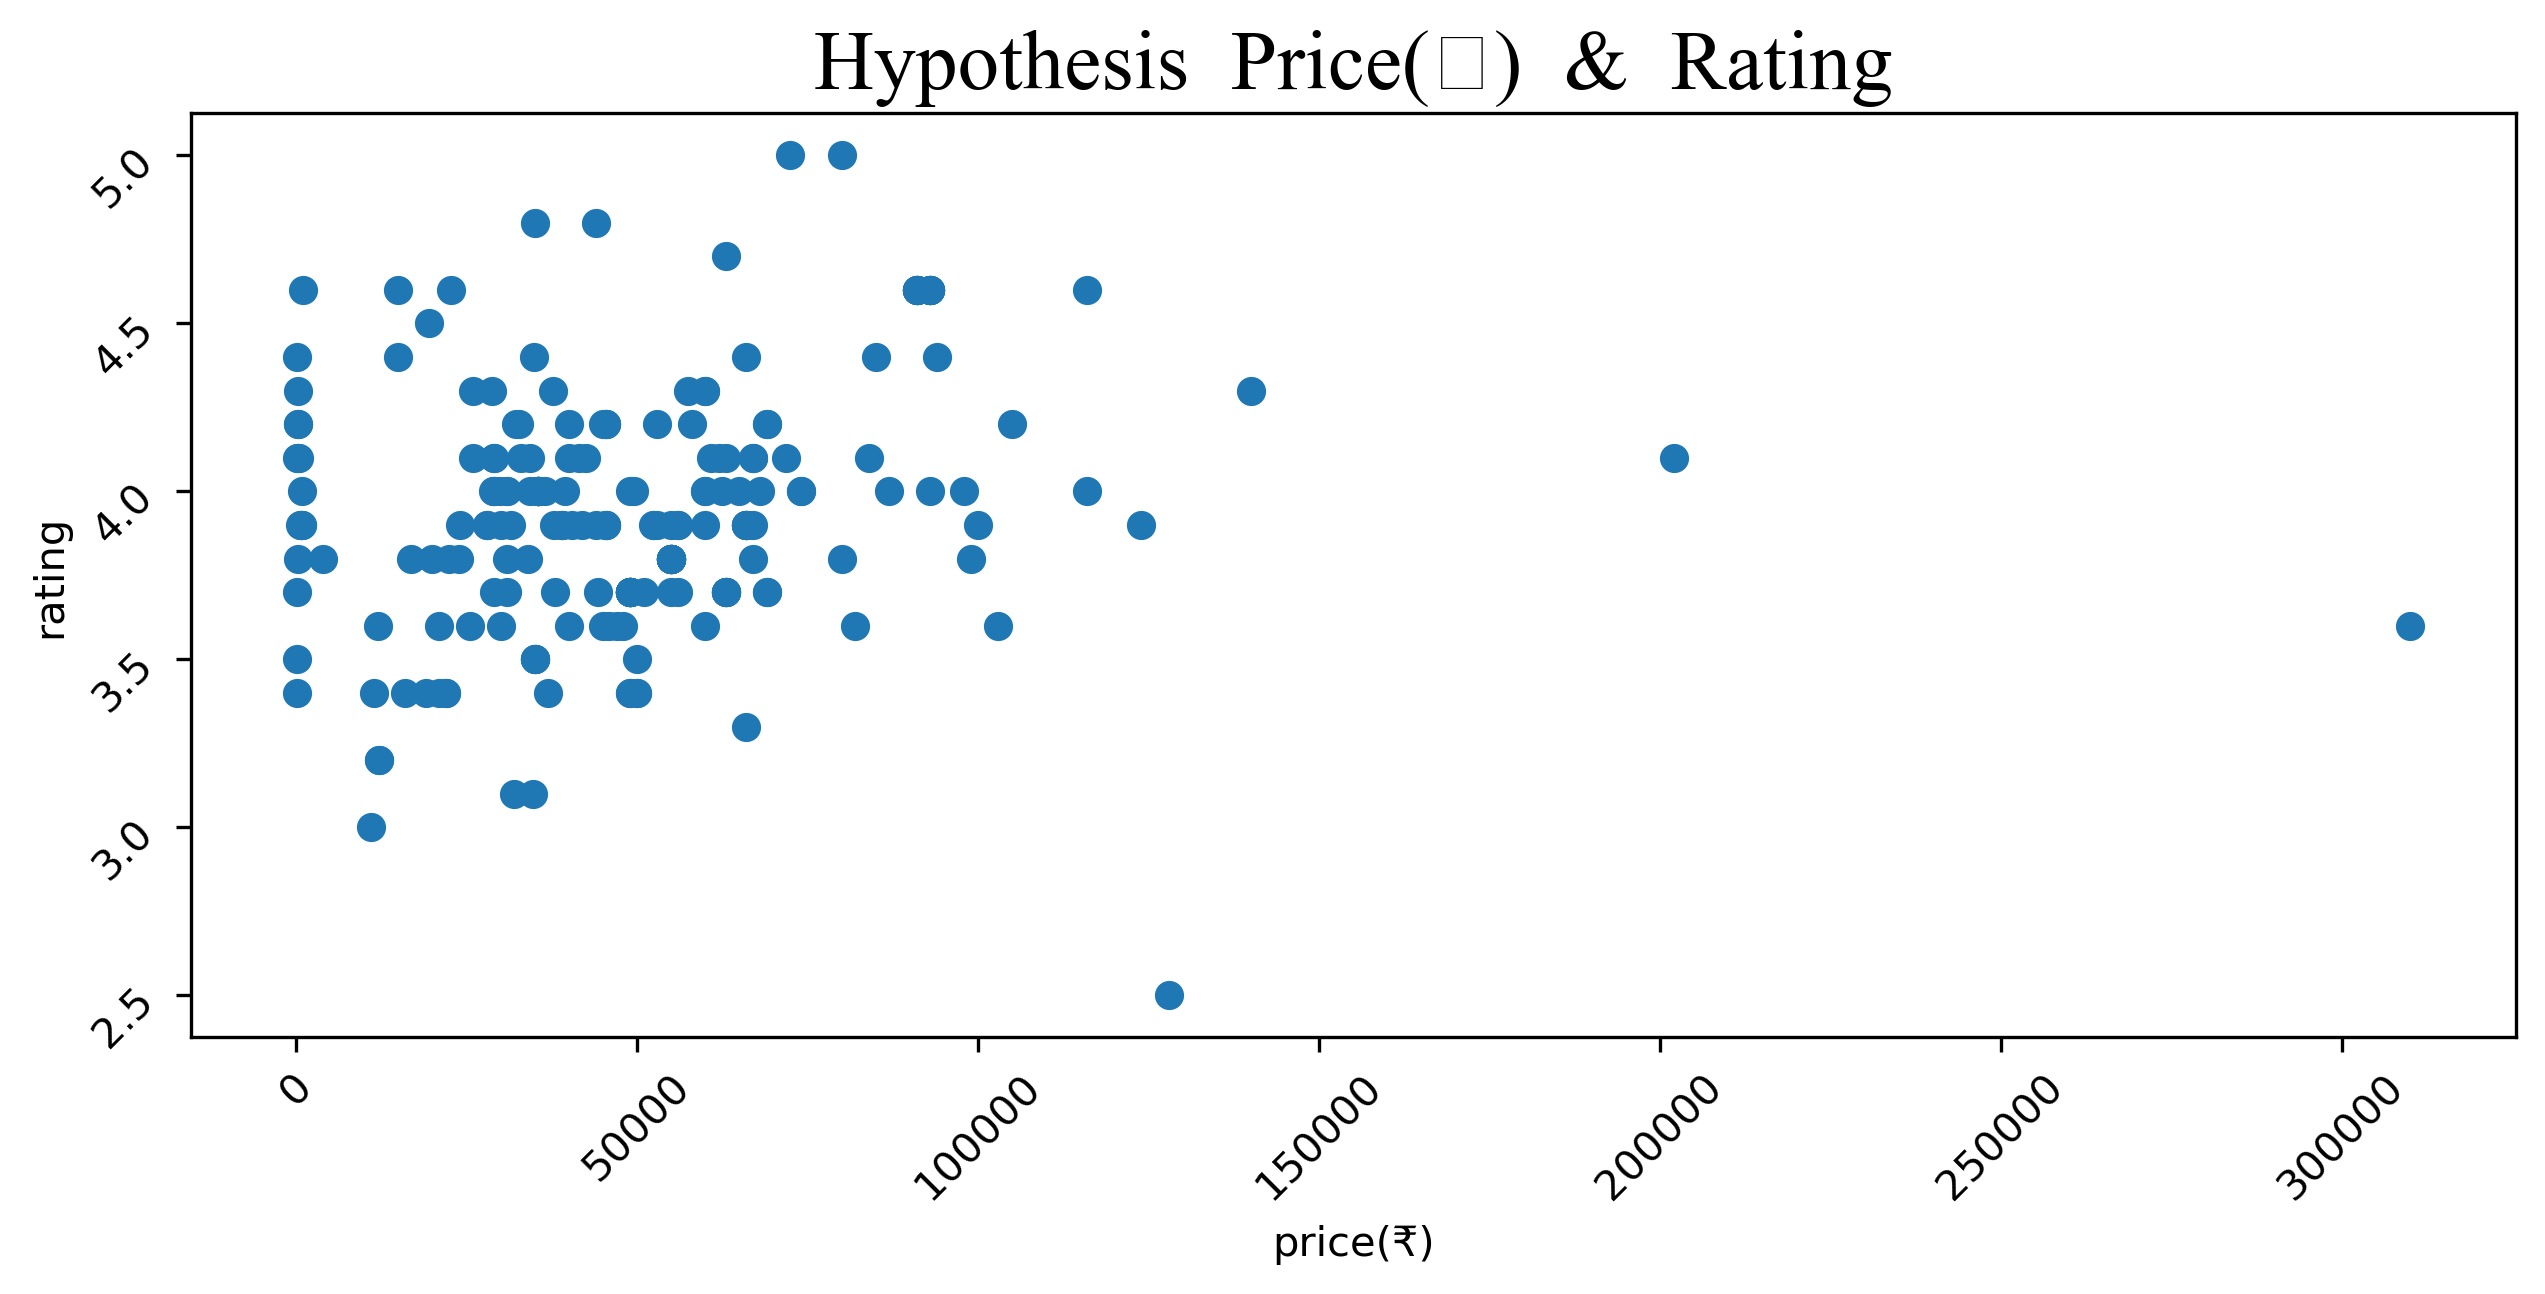

In [152]:
# 1 gipoteza 
plt.figure(figsize=(10, 4), dpi= 300)
plt.scatter(df['price(₹)'], df['rating'])
plt.xlabel('price(₹)')
plt.ylabel('rating')
plt.title('Hypothesis  Price(₹)  &  Rating', fontdict= {'fontname': 'Times New Roman', 'fontsize': 20})
plt.xticks(rotation= 45)
plt.yticks(rotation= 45)

#plt.savefi('normativ_scatter.png', dpi= 300)
plt.show()


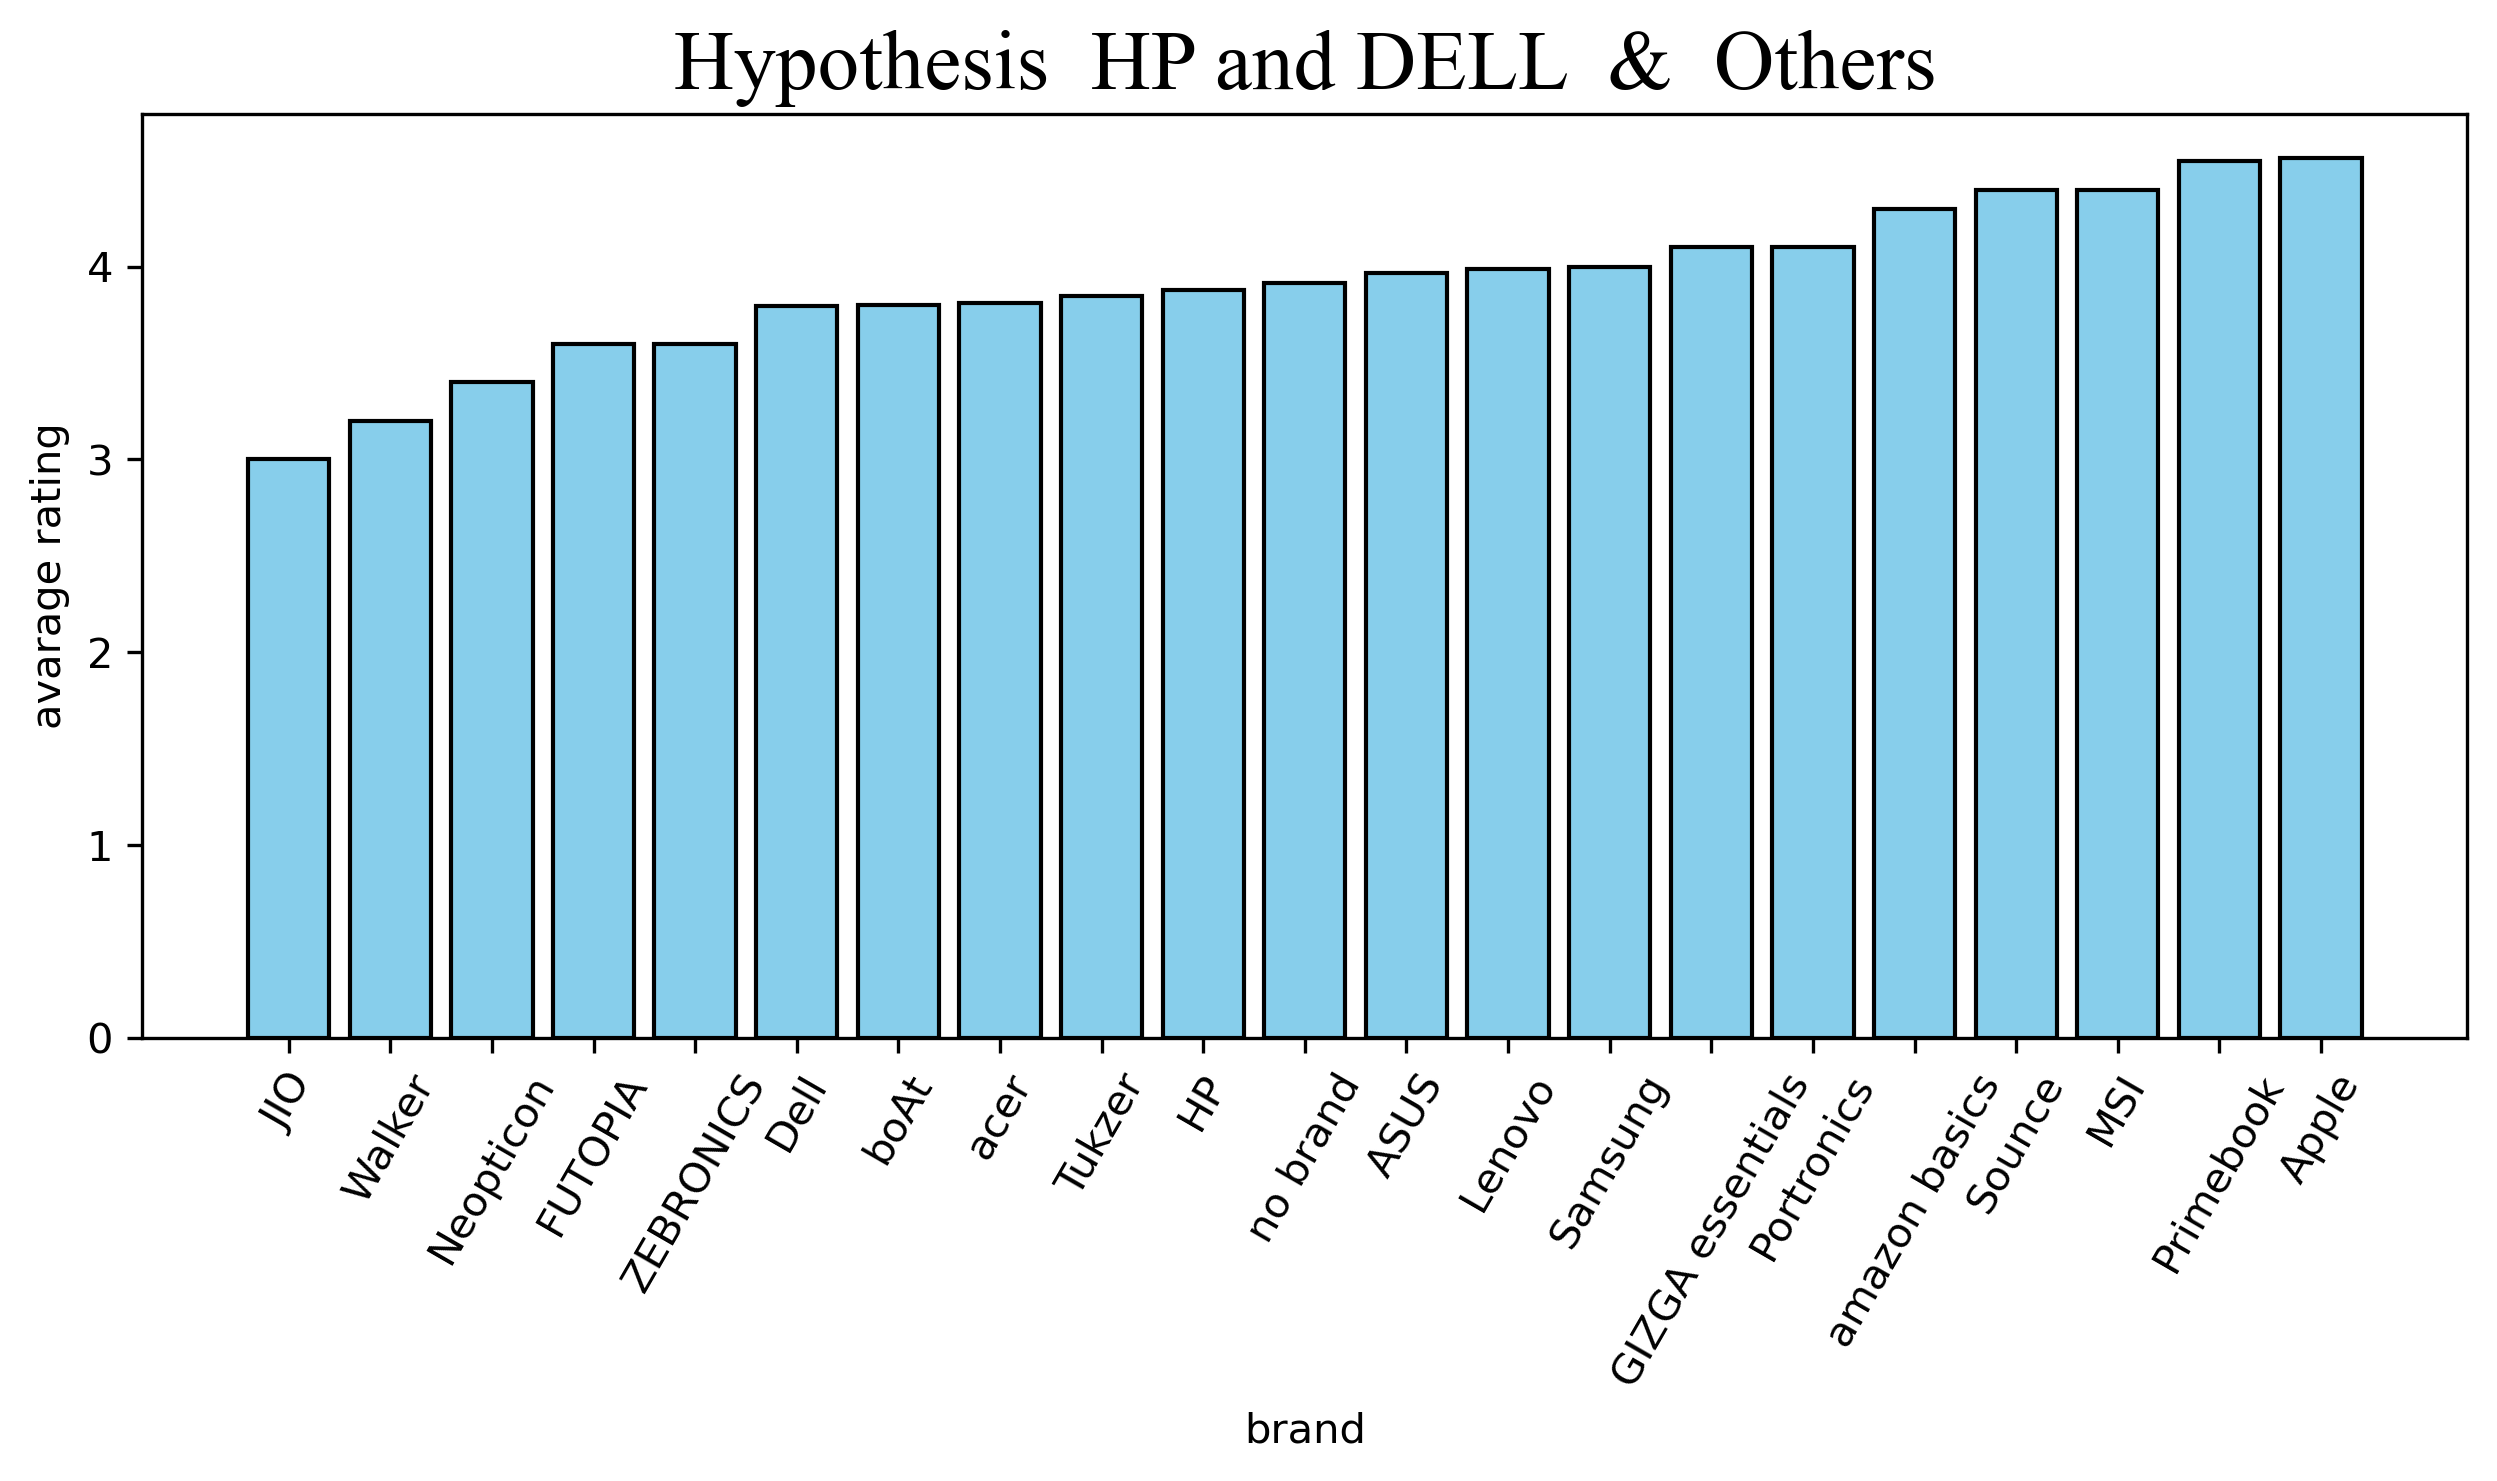

In [153]:
# 2 gipoteza with bar
plt.figure(figsize=(10, 4), dpi= 300)
avg_rating = df.groupby('brand')['rating'].mean().sort_values(ascending= True)
plt.bar(avg_rating.index, avg_rating.values, color='skyblue', edgecolor= 'black')
plt.xlabel('brand')
plt.ylabel('avarage rating')
plt.title('Hypothesis  HP and DELL  &  Others', fontdict= {'fontname': 'Times New Roman', 'fontsize': 20})
plt.xticks(rotation= 60)
#plt.yticks(rotation= 90)

#plt.savefi('normativ_ferg.png', dpi= 300)
plt.show()


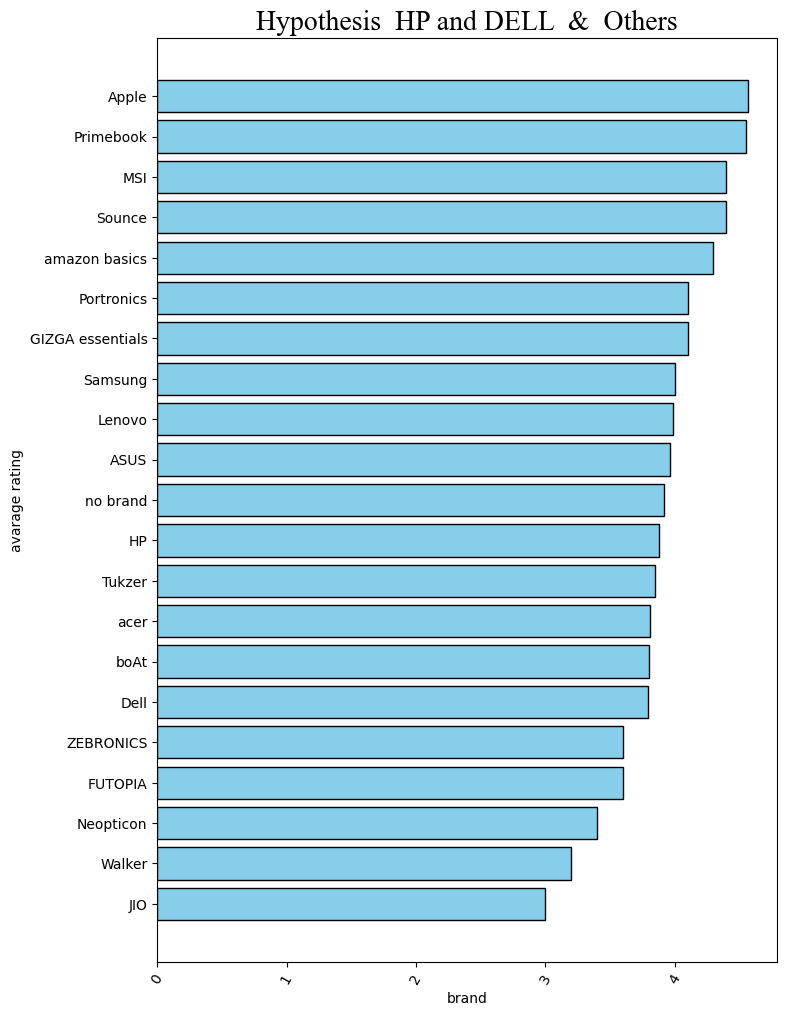

In [154]:
# 2 gipoteza with barh
plt.figure(figsize=(8, 12), dpi= 100)
avg_rating = df.groupby('brand')['rating'].mean().sort_values(ascending= True)
plt.barh(avg_rating.index, avg_rating.values, color='skyblue', edgecolor= 'black')
plt.xlabel('brand')
plt.ylabel('avarage rating')
plt.title('Hypothesis  HP and DELL  &  Others', fontdict= {'fontname': 'Times New Roman', 'fontsize': 20})
plt.xticks(rotation= 60)
#plt.yticks(rotation= 90)

#plt.savefi('normativ_hp.png', dpi= 300)
plt.show()


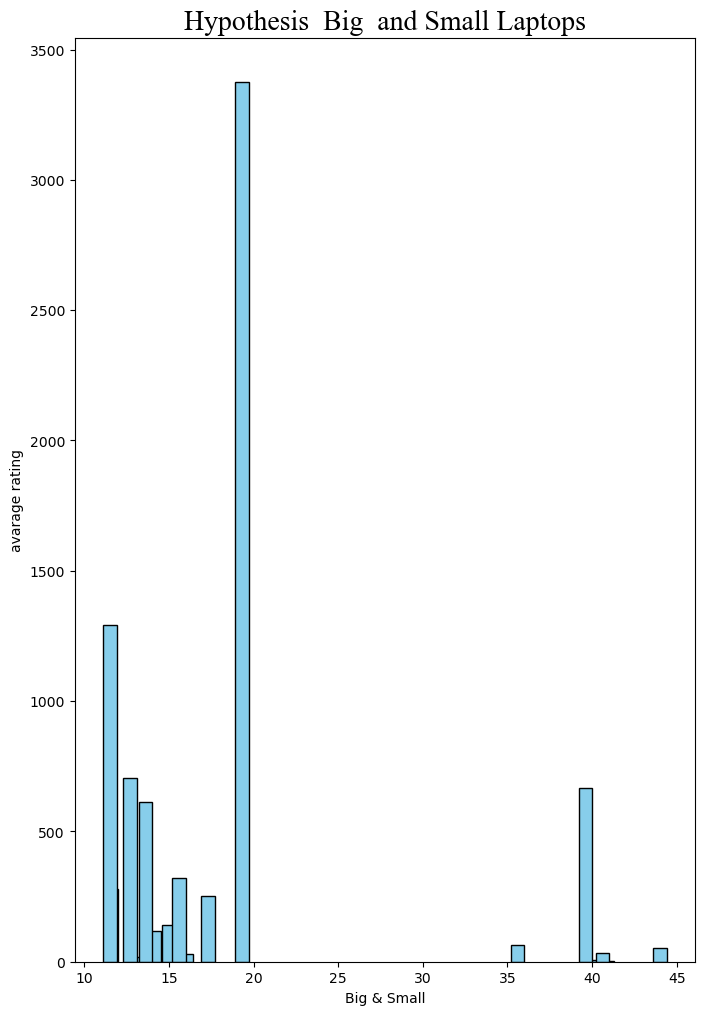

In [155]:
# 3 gipoteza with barh
plt.figure(figsize=(8, 12), dpi= 100)
avg_rating = df.groupby('screen_size (sm)')['rating_review'].mean().sort_values(ascending= True)
plt.bar(avg_rating.index, avg_rating.values, color='skyblue', edgecolor= 'black')
plt.xlabel('Big & Small')
plt.ylabel('avarage rating')
plt.title('Hypothesis  Big  and Small Laptops', fontdict= {'fontname': 'Times New Roman', 'fontsize': 20})
plt.xticks(rotation= 0)
plt.yticks(rotation= 0)

df['screen_group'] = np.where(df['screen_size (sm)'] >= 15, 'Big (≥15")', 'Small (<15")')


#plt.savefig('normativ.png', dpi= 300)
plt.show()


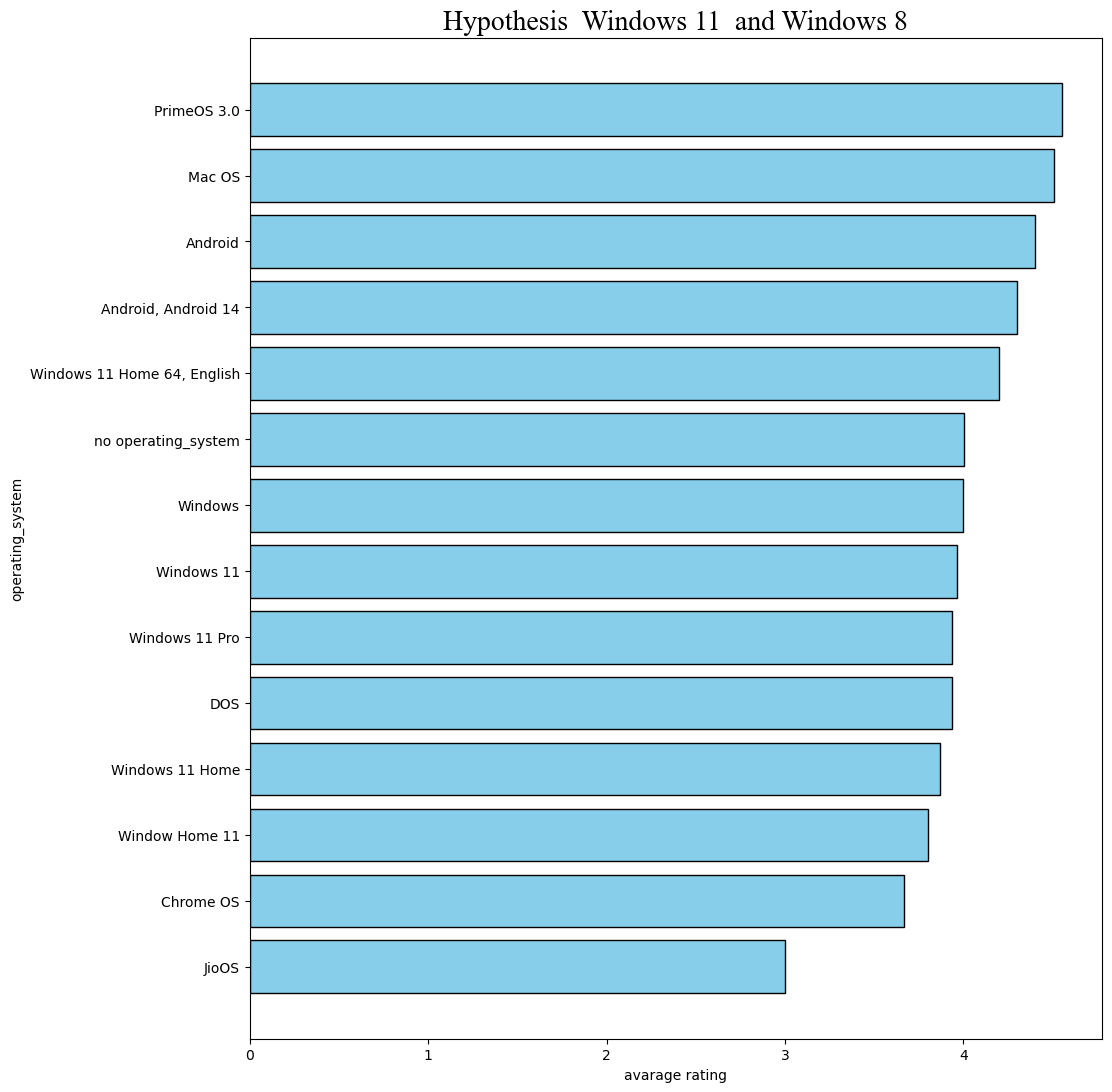

In [156]:
# 4 gipoteza with barh
plt.figure(figsize=(11, 13), dpi= 100)
avg_rating = df.groupby('operating_system')['rating'].mean().sort_values(ascending= True)
plt.barh(avg_rating.index, avg_rating.values, color='skyblue', edgecolor= 'black')
plt.xlabel('avarage rating')
plt.ylabel('operating_system')
plt.title('Hypothesis  Windows 11  and Windows 8', fontdict= {'fontname': 'Times New Roman', 'fontsize': 20})
plt.xticks(rotation= 0)
plt.yticks(rotation= 0)



#plt.savefig('normativ.png', dpi= 300)
plt.show()


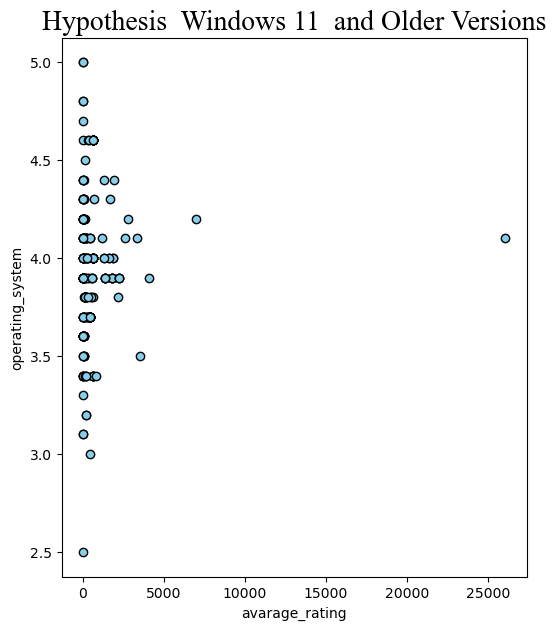

In [157]:
# 5 gipoteza with scatter
plt.figure(figsize=(6, 7), dpi= 100)
plt.scatter(df['rating_review'], df['rating'], color='skyblue', edgecolor= 'black')
plt.xlabel('avarage_rating')
plt.ylabel('operating_system')
plt.title('Hypothesis  Windows 11  and Older Versions', fontdict= {'fontname': 'Times New Roman', 'fontsize': 20})
plt.xticks(rotation= 0)
plt.yticks(rotation= 0)



#plt.savefig('normativ.png', dpi= 300)
plt.show()


/tmp/ipykernel_5020/3032119226.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price = df.groupby('price_group')['rating'].mean().sort_values(ascending= True)


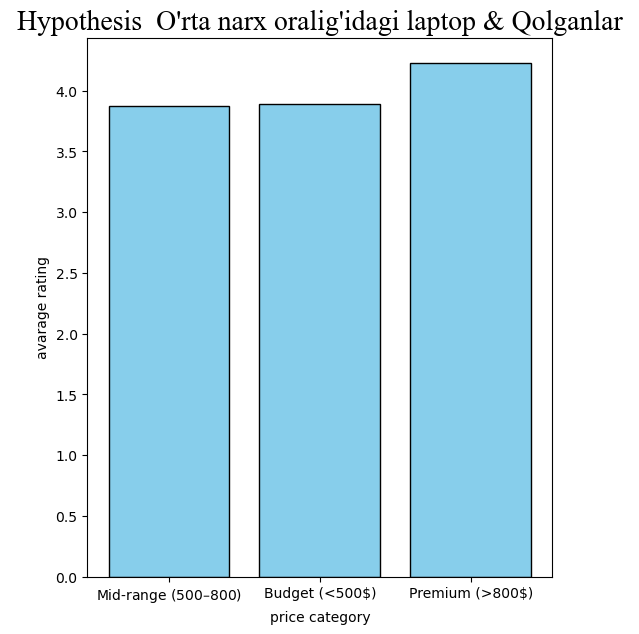

In [158]:
# 6 gipoteza with bar
plt.figure(figsize=(6, 7), dpi= 100)
plt.xlabel('price category')
plt.ylabel('avarage rating')
plt.title(" Hypothesis  O'rta narx oralig'idagi laptop & Qolganlar ", fontdict= {'fontname': 'Times New Roman', 'fontsize': 20})
plt.xticks(rotation= 0)
plt.yticks(rotation= 0)

labels = ['Budget (<500$)', 'Mid-range (500$–800$)', 'Premium (>800$)']
bins = [0, 43990, 70384, df['price(₹)'].max()]
df['price_group'] = pd.cut(df['price(₹)'], bins=bins, labels=labels)
avg_price = df.groupby('price_group')['rating'].mean().sort_values(ascending= True)
plt.bar(avg_price.index, avg_price.values, color='skyblue', edgecolor= 'black')

    

#plt.savefig('normativ.png', dpi= 300)
plt.show()


/tmp/ipykernel_5020/90389959.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price = df.groupby('screen_group')['price(₹)'].mean().sort_values(ascending= True)


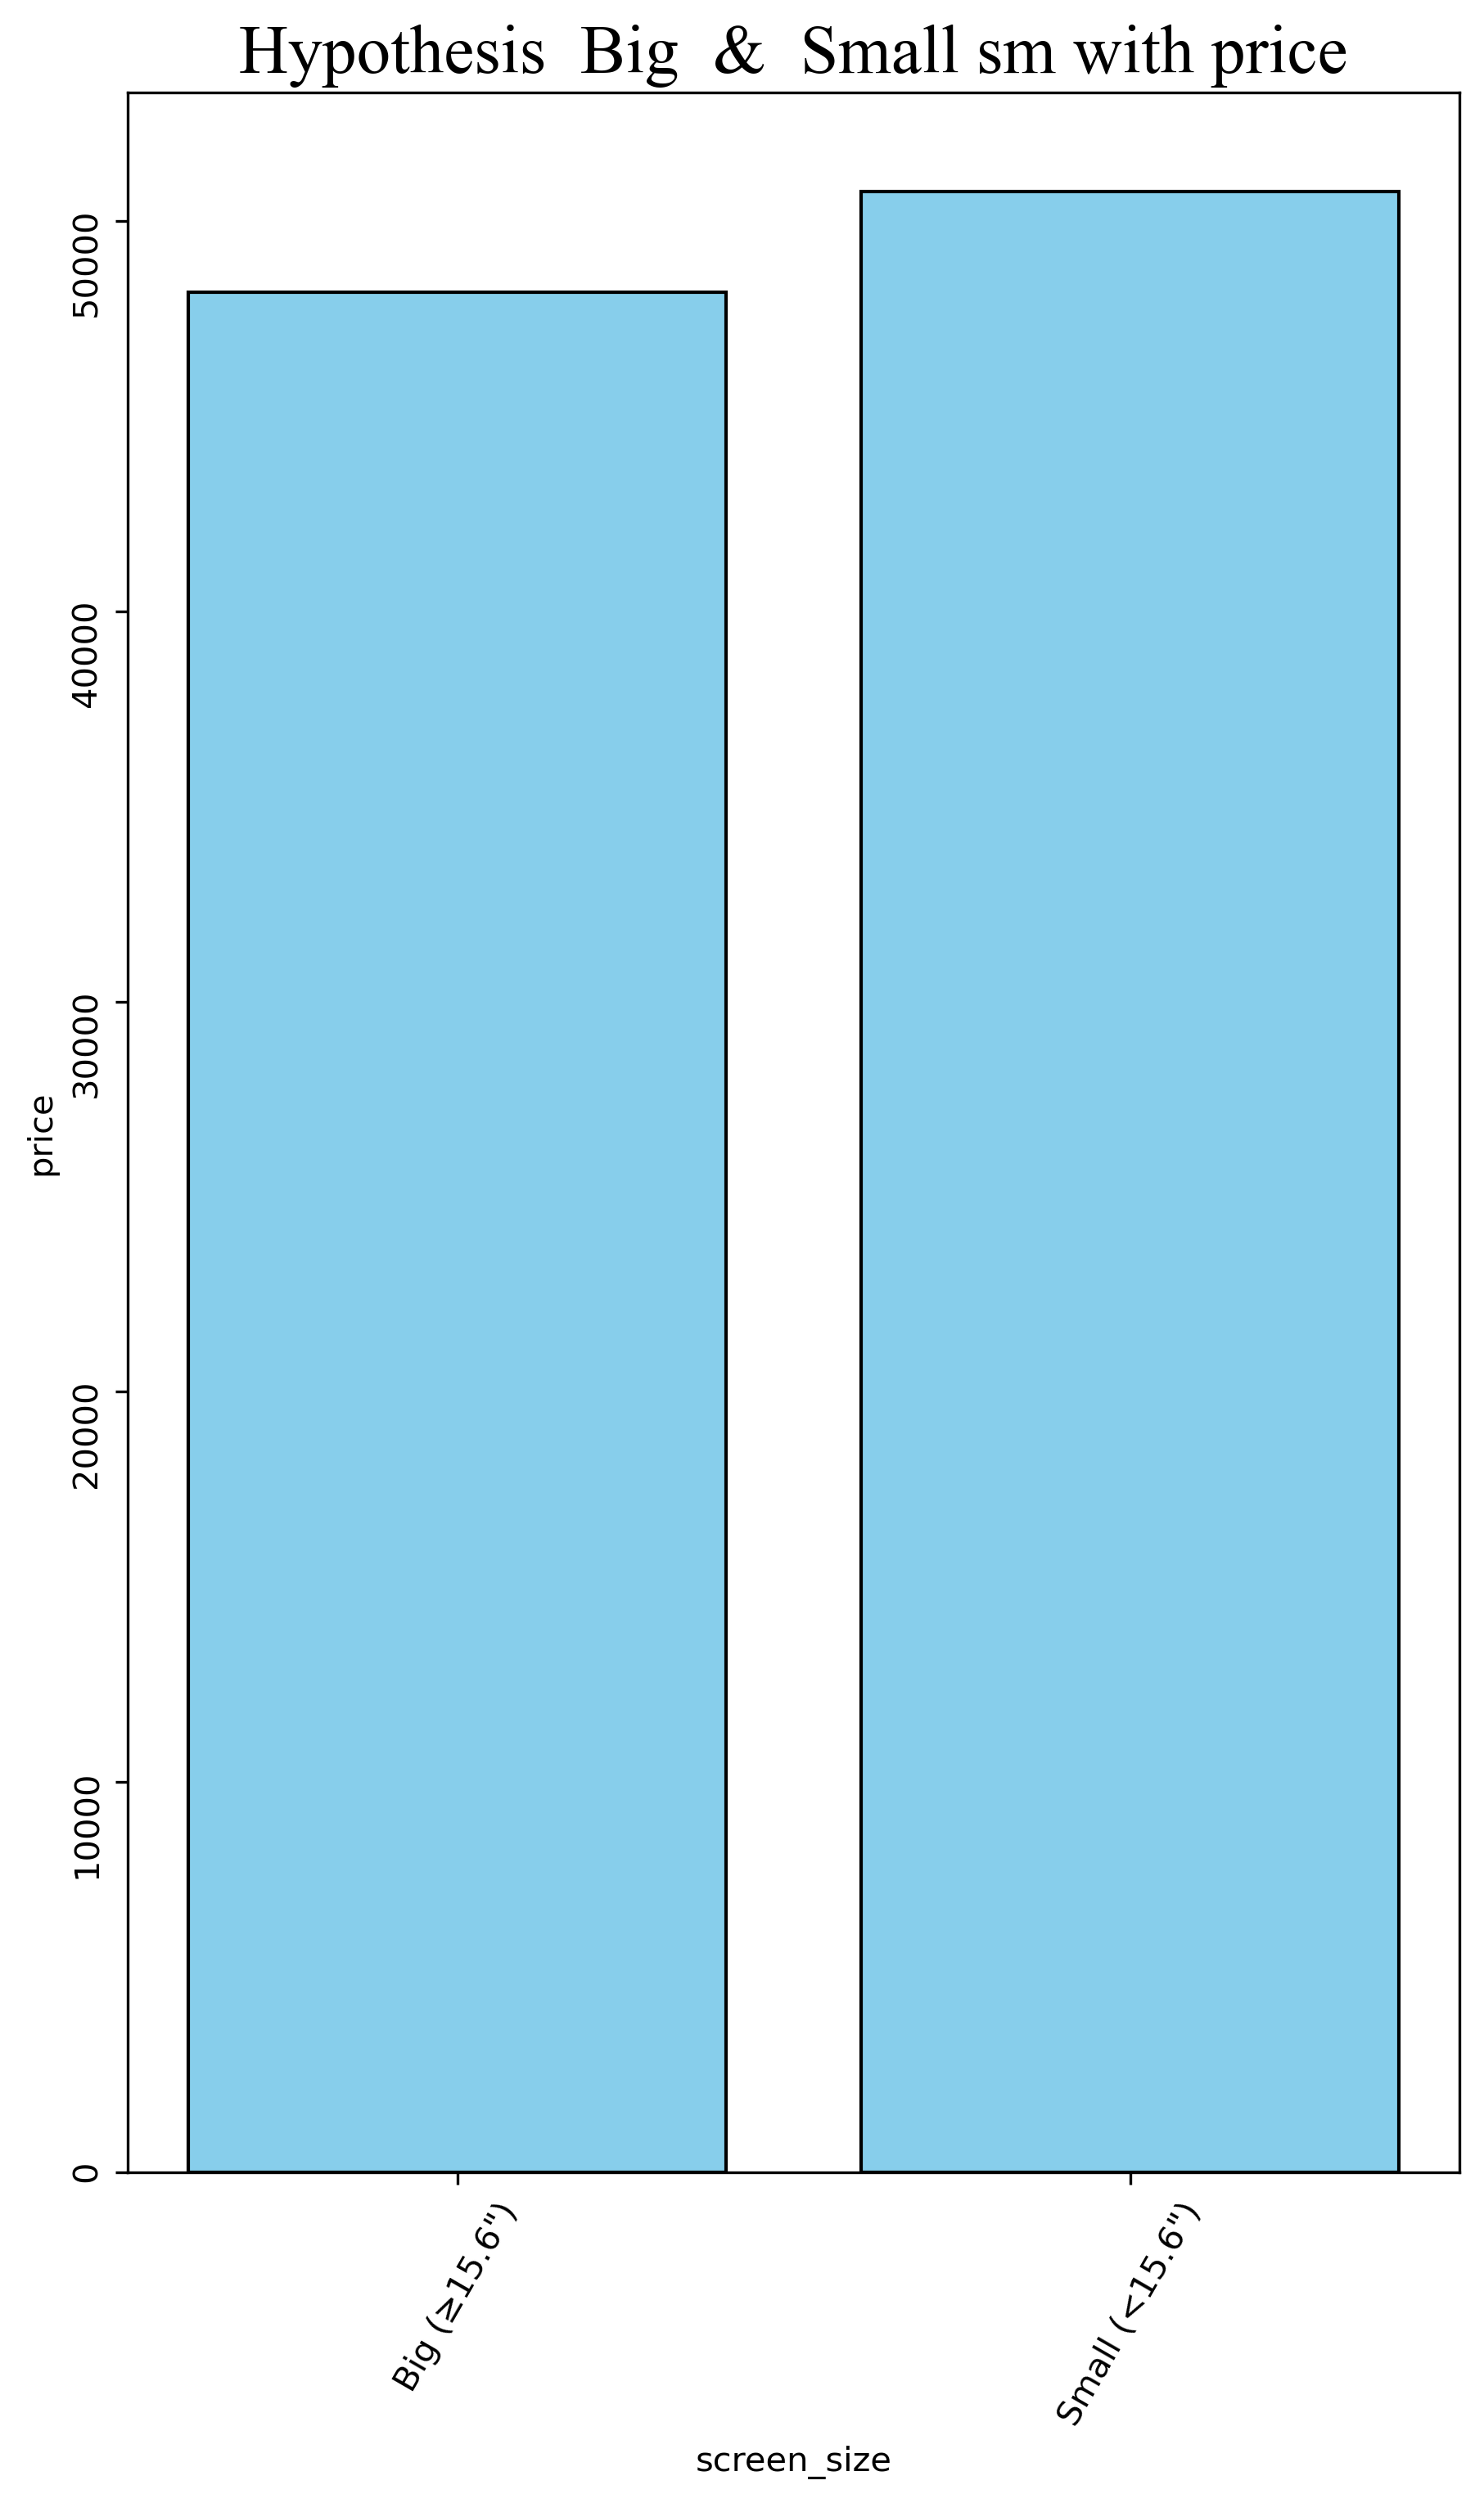

In [159]:
# 7 gipoteza with bar
plt.figure(figsize=(7, 11), dpi= 300)
plt.xlabel('screen_size')
plt.ylabel('price')
plt.title('Hypothesis  Big  &  Small sm with price', fontdict= {'fontname': 'Times New Roman', 'fontsize': 20})
plt.xticks(rotation= 60)
plt.yticks(rotation= 90)

bins = [0, 15.6, df['screen_size (sm)'].max()]  
labels = ['Small (<15.6")', 'Big (≥15.6")']
df['screen_group'] = pd.cut(df['screen_size (sm)'], bins=bins, labels=labels)
avg_price = df.groupby('screen_group')['price(₹)'].mean().sort_values(ascending= True)
plt.bar(avg_price.index, avg_price.values, color='skyblue', edgecolor= 'black')



#plt.savefig('normativ_ferg.png', dpi= 300)
plt.show()


amd: 56105.38461538462, intel: 51324.21052631579


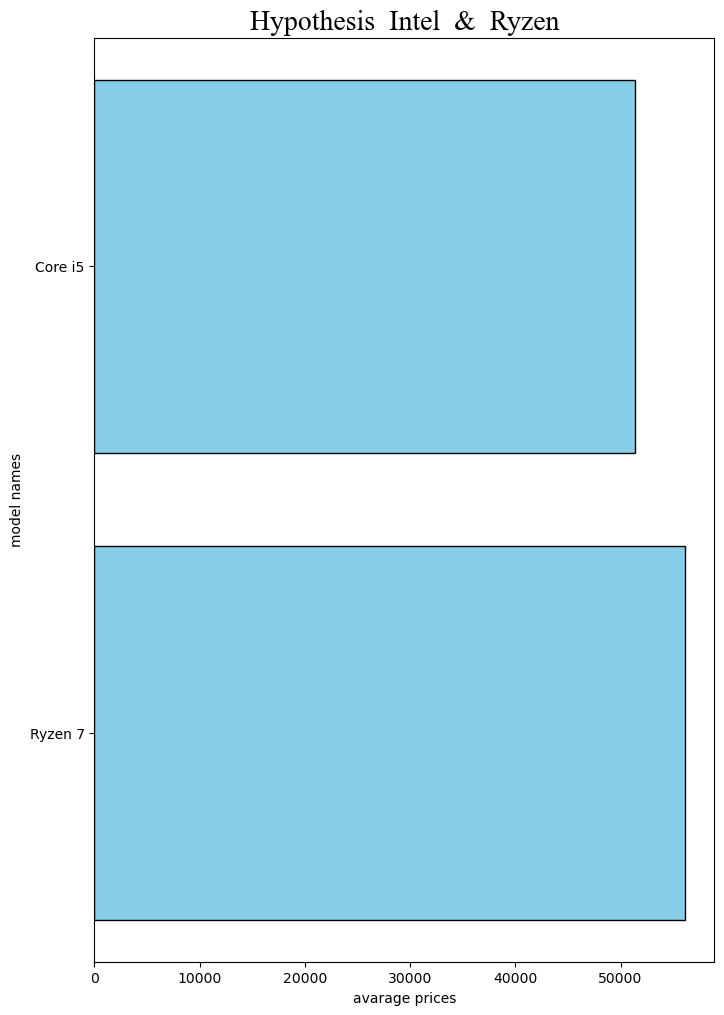

In [160]:
# 8 gipoteza with barh
plt.figure(figsize=(8, 12), dpi= 100)
plt.xlabel('avarage prices')
plt.ylabel('model names')
plt.title('Hypothesis  Intel  &  Ryzen', fontdict= {'fontname': 'Times New Roman', 'fontsize': 20})
plt.xticks(rotation= 0)
plt.yticks(rotation= 0)

amd = df[df['cpu_model'] == 'Ryzen 7']['price(₹)'].mean()
intel = df[df['cpu_model'] == 'Core i5']['price(₹)'].mean()
print(f"amd: {amd}, intel: {intel}")
models = ['Ryzen 7', 'Core i5']
avg_prices = [amd, intel]
plt.barh(models, avg_prices, color='skyblue', edgecolor= 'black')



#plt.savefi('normativ_hp.png', dpi= 300)
plt.show()


Ryzen 7 average price: 56105.38461538462
Core i5 average price: 51324.21052631579


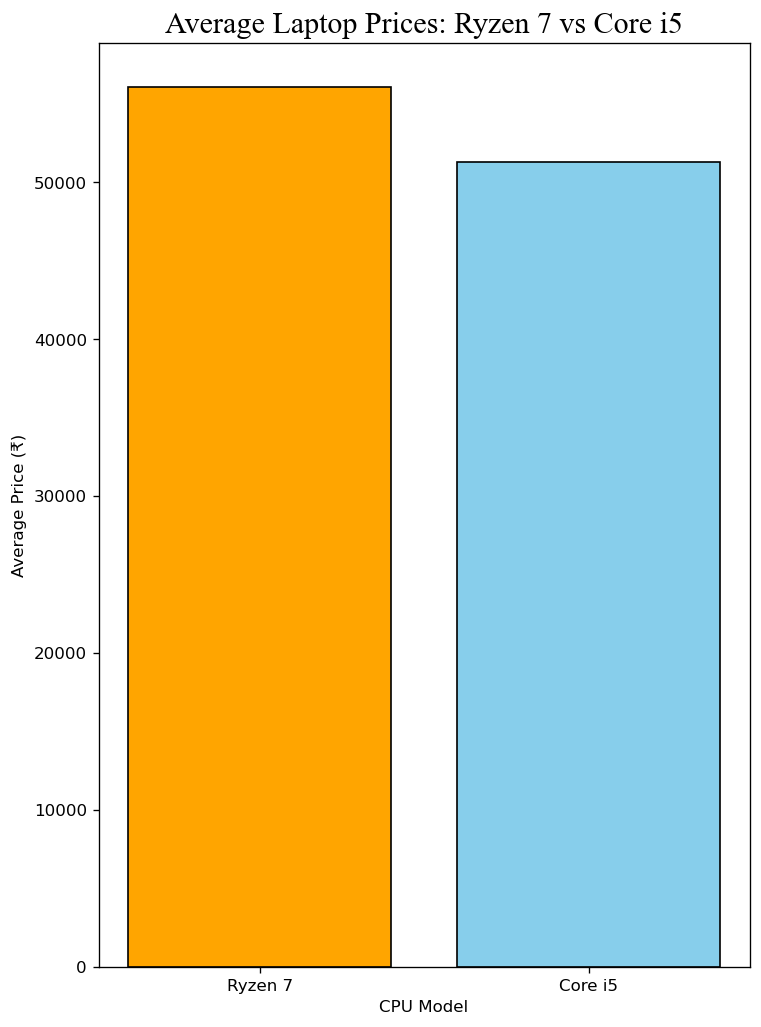

In [161]:
# 8-gipoteza: Ryzen 7 vs Core i5 price comparison (vertical bar)

amd = df[df['cpu_model'] == 'Ryzen 7']['price(₹)'].mean()
intel = df[df['cpu_model'] == 'Core i5']['price(₹)'].mean()

print(f"Ryzen 7 average price: {amd}")
print(f"Core i5 average price: {intel}")

models = ['Ryzen 7', 'Core i5']
avg_prices = [amd, intel]

plt.figure(figsize=(7, 10), dpi=120)
plt.bar(models, avg_prices, color=['orange', 'skyblue'], edgecolor='black')
plt.ylabel('Average Price (₹)')
plt.xlabel('CPU Model')
plt.title('Average Laptop Prices: Ryzen 7 vs Core i5', 
          fontdict={'fontname': 'Times New Roman', 'fontsize': 18})
plt.show()


In [ ]:
git init

In [165]:
git add .

SyntaxError: invalid syntax (3827820173.py, line 1)